In [ ]:
# author: Martin Schaffer
# adopted from TALENT2022

In [29]:
from scipy import constants as c
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps

import numpy as np

In [30]:

#particle masses [MeV]
m1 = c.value("proton mass energy equivalent in MeV")
m2 = c.value("neutron mass energy equivalent in MeV")

m_red = m1*m2/(m1+m2)

#constants
hbarc = 197.3269804

#orbital momentum (here we assume l <= 3)
l = 0

#step [fm]
h = 0.01

#relative distance (boundaries) [fm] and r_grid
rmin = 0
rmax = 70

rgrid_points = int((rmax-rmin)/h) + 1

r_grid = np.linspace(rmin, rmax, num=rgrid_points, endpoint=True)

# energy region Eb in <Eb_min,Eb_max> [MeV]
Eb_min = -5.
Eb_max = 0



In [31]:
#============================================ POTENTIALS ================================================
def pot_Volkov(r) :
    return(144.86*np.exp(-r*r/0.82**2) - 83.34*np.exp(-r*r/1.6**2))
  
def pot_MTV(r) :
    return(1458.05*np.exp(-r*3.11)/r - 578.09*np.exp(-1.55*r)/r)
  
def pot_ATS3(r) :
    return (1000.0*np.exp(-r*r*3.0) - 326.7*np.exp(-r*r*1.05) - 43.0*np.exp(-r*r*0.6) )
  
def pot_Minnesota(r) :
    return(  200.*np.exp(-1.487*r**2) - 178.*np.exp(-0.639*r**2)  )



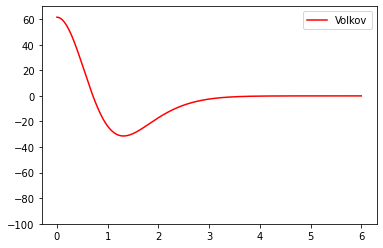

In [32]:
r = np.linspace(0,6, 1000)

plt.ylim(-100,70)
plt.plot(r, pot_Volkov(r), color='red', label='Volkov')
### COMPLETE other potentials

plt.legend()


In [10]:
def normalization(u) :
    
    norm = simps(np.abs(u)**2, r_grid)
    u_norm = u/np.sqrt(norm)
    
    return u_norm


In [24]:
def RMS(u):
    ### COMPLETE
    
    #sqrt( \int |u(r)|^2 r^2 dr  )
    

In [11]:
def numerov_wf(E, potential) :

    k = np.zeros(len(r_grid))
    u = np.zeros(len(r_grid))
    
    C = 2.*m_red/hbarc**2
    
    ### COMPLETE
    
    #initial conditions [for r->0; u(r)=r^(l+1)]  
    
    
    #initializing k[r] = 2\mu/hbarc^2 (E - V[r] - hbarc^2 * l*(l+1)/(2.*\mu * r^2))
    
    
    # recursive relation for forward Numerov algorithm


    u_norm = normalization(u)
    
    return(u_norm)

In [12]:
def bound_states(potential) :
    
    print("Bound state calculation : \n")
    
    energy_grid_points = 10

    #numerical accuracy of bound state energy solution
    eps = 1.e-8
    
    #maximal number of iterations
    itr_max = 100

    itr=0
    Eb_prev = Eb_min
    Eb_curr = Eb_max
    
    while itr<itr_max and np.abs(Eb_prev-Eb_curr)>eps:
        itr+=1
        Eb_grid = np.linspace(Eb_prev, Eb_curr, num=energy_grid_points, endpoint=True)
        
        for i in range(0,len(Eb_grid)):
            u = numerov_wf(Eb_grid[i], potential)
            if i>0 and u_prev*u[-1] < 0:
                Eb_curr=Eb_grid[i]
            
                line = str(itr) + ". \t E \t = \t"+ "{0:.6f}".format(Eb_curr) + "\t \t u(rmax) \t = \t " + "{0:.6f}".format(u[-1])
                print(line)
                break
            
            else:
                u_prev = u[len(u)-1]
                Eb_prev = Eb_grid[i]
    print("=========================================================================")     
    return Eb_curr, u

In [ ]:
E_bound, u = bound_states(pot_MTV)

rms = RMS(u)
print('Radius', rms)

plt.plot(r_grid, u)
